In [41]:
import pandas as pd
import gzip as gz
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [75]:
#Debido a que 2 de los 3 archivos json tienen un error (las claves de los diccionarios usan comilla simple,
#cuando la sintaxis de json requiere que sean comillas dobles) se crea la funcion crear_dataframe_jason_error la cual toma por argumento
#la ruta para acceder al archivo json comprimido, descomprime el mismo como texto, separa las lineas creando una lista de lineas,
#itera por cada una de ellas convirtiendolas en diccionarios mediante la funcion eval y guardando cada uno de ellos en una lista
#de diccionarios, luego se crea un dataframe con pandas a partir de dicha lista de diccionarios el cual retorna la funcion.
def crear_dataframe_json_error(path):
    with gz.open(path, 'rt', encoding='utf-8') as archivo:
        dataset = archivo.read()

    lineas = dataset.strip().split('\n')
    lista_de_diccionarios = []
    for linea in lineas:
        diccionario = eval(linea)
        lista_de_diccionarios.append(diccionario)
    
    df = pd.DataFrame(lista_de_diccionarios)

    return df

#Funcion para imprimir un ejemplo no nulo de cada variable
def imprimir_ejemplos(df, variables = list):
    ejemplo = []
    titulo = []
    for elemento in variables:
        for valor in df[elemento]:
            flag = 0
            while valor != None and type(valor) != float:
                ejemplo.append(valor)
                titulo.append(elemento)
                flag = 1
                break
            while type(valor) == float and not math.isnan(valor):
                ejemplo.append(valor)
                titulo.append(elemento)
                flag = 1
                break
            if flag == 1:
                break
    for i in range(len(ejemplo)):
        print(titulo[i], ': ', ejemplo[i])

def repres_categoricas(df, columna = str):
    df[columna] = df[columna].astype(str)
    texto = '-'.join(df[columna])
    nube = WordCloud(width=1200, height=800, background_color='#f5f5f5').generate(texto)

    frecuencias = Counter(texto.split('-'))

    # Encontrar la palabra más repetida y su frecuencia
    palabra_mas_repetida = frecuencias.most_common(10)

    # Calcular el porcentaje de la palabra más repetida sobre el total de palabras
    total_palabras = sum(frecuencias.values())
    porcentajes = [(palabra, (frecuencia / total_palabras) * 100) for palabra, frecuencia in palabra_mas_repetida]


    plt.figure(figsize=(10, 5))
    plt.imshow(nube, interpolation='bilinear')
    plt.axis('off')
    plt.show()
    # Graficar los porcentajes
    plt.figure(figsize=(10, 5))
    palabras, porcentajes = zip(*porcentajes)
    plt.barh(palabras, porcentajes, color=['#1f77b4', '#ff7f0e', '#2ca02c',
                                        '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
    plt.xlabel('Porcentaje')
    plt.title('Porcentaje de las 10 Palabras más Repetidas sobre el total')
    plt.gca().invert_yaxis()  # Invertir el eje y para que las palabras más repetidas estén en la parte superior
    plt.show()
    

In [4]:
#Se crea el dataframe df_steam_games con pandas accediendo directamente al archivo json ya que el mismo esta correcto
df_steam_games = pd.read_json("C:/Users/eduen/AppData/Local/Temp/steam_games.json.gz", lines=True, compression='gzip')


In [5]:
#Se crea el dataframe df_user_reviews a partir del archivo json utilizando la funcion crear_dataframe_json_error
df_user_reviews = crear_dataframe_json_error("C:/Users/eduen/AppData/Local/Temp/user_reviews.json.gz")

In [6]:
#Se crea el dataframe df_users_items a partir del archivo json utilizando la funcion crear_dataframe_json_error
#df_users_items = crear_dataframe_json_error("C:/Users/eduen/AppData/Local/Temp/users_items.json.gz")

DATASET STEAM_GAMES

In [7]:
df_steam_games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer,user_id,steam_id,items,items_count
0,None,None,None,None,None,None,None,None,NaN,None,None,NaN,NaN,None,None,76561197970982479,7.656120e+16,"[{'item_id': '10', 'item_name': 'Counter-Strik...",277.0
1,None,None,None,None,None,None,None,None,NaN,None,None,NaN,NaN,None,None,js41637,7.656120e+16,"[{'item_id': '10', 'item_name': 'Counter-Strik...",888.0
2,None,None,None,None,None,None,None,None,NaN,None,None,NaN,NaN,None,None,evcentric,7.656120e+16,"[{'item_id': '1200', 'item_name': 'Red Orchest...",137.0
3,None,None,None,None,None,None,None,None,NaN,None,None,NaN,NaN,None,None,Riot-Punch,7.656120e+16,"[{'item_id': '10', 'item_name': 'Counter-Strik...",328.0
4,None,None,None,None,None,None,None,None,NaN,None,None,NaN,NaN,None,None,doctr,7.656120e+16,"[{'item_id': '300', 'item_name': 'Day of Defea...",541.0


In [8]:
#Obtener informacion del dataset
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       24083 non-null  object 
 1   genres          28852 non-null  object 
 2   app_name        32133 non-null  object 
 3   title           30085 non-null  object 
 4   url             32135 non-null  object 
 5   release_date    30068 non-null  object 
 6   tags            31972 non-null  object 
 7   reviews_url     32133 non-null  object 
 8   discount_price  225 non-null    float64
 9   specs           31465 non-null  object 
 10  price           30758 non-null  object 
 11  early_access    32135 non-null  float64
 12  id              32133 non-null  float64
 13  metascore       2677 non-null   object 
 14  developer       28836 non-null  object 
 15  user_id         88310 non-null  object 
 16  steam_id        88310 non-null  float64
 17  items           88310 non-nul

In [9]:
#Clasificar en variables categoricas o numericas, luego almacenar en dos listas diferentes.
variables_categoricas = ['publisher', 'genres', 'app_name', 'title', 'url', 'release_date', 'tags', 'reviews_url', 'specs', 'early_access', 'id', 'developer', 'user_id', 'steam_id', 'items']

variables_numericas = ['discount_price', 'price', 'metascore', 'items_count']

EJEMPLO NO NULO DE VARIABLES NUMERICAS

In [10]:
imprimir_ejemplos(df_steam_games, variables_numericas)


discount_price :  4.49
price :  4.99
metascore :  96
items_count :  277.0


EJEMPLO NO NULO DE VARIABLES CATEGORICAS

In [11]:
imprimir_ejemplos(df_steam_games, variables_categoricas)

publisher :  Kotoshiro
genres :  ['Action', 'Casual', 'Indie', 'Simulation', 'Strategy']
app_name :  Lost Summoner Kitty
title :  Lost Summoner Kitty
url :  http://store.steampowered.com/app/761140/Lost_Summoner_Kitty/
release_date :  2018-01-04
tags :  ['Strategy', 'Action', 'Indie', 'Casual', 'Simulation']
reviews_url :  http://steamcommunity.com/app/761140/reviews/?browsefilter=mostrecent&p=1
specs :  ['Single-player']
early_access :  0.0
id :  761140.0
developer :  Kotoshiro
user_id :  76561197970982479
steam_id :  7.656119797098248e+16
items :  [{'item_id': '10', 'item_name': 'Counter-Strike', 'playtime_forever': 6, 'playtime_2weeks': 0}, {'item_id': '20', 'item_name': 'Team Fortress Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '30', 'item_name': 'Day of Defeat', 'playtime_forever': 7, 'playtime_2weeks': 0}, {'item_id': '40', 'item_name': 'Deathmatch Classic', 'playtime_forever': 0, 'playtime_2weeks': 0}, {'item_id': '50', 'item_name': 'Half-Life: Opposing F

PRIMERA PROPUESTA DE TRANSFORMACIONES

- Se eliminaran las columnas 'user_id', 'steam_id', 'items' e 'items_count' por tratarse de datos de usuarios, los mismos seran
tratados en el dataset users_items con el objetivo de no contaminar ni sesgar los datos de videojuegos.
- Se eliminaran todas las filas en la que la variable 'title' posea valores nulos por considerarse un dato
relevante.


In [12]:
df_steam_games['price'].unique()

array([None, 4.99, 'Free To Play', 'Free to Play', 0.99, 2.99, 3.99, 9.99,
       18.99, 29.99, 'Free', 10.99, 1.5899999999999999, 14.99, 1.99,
       59.99, 8.99, 6.99, 7.99, 39.99, 19.99, 7.49, 12.99, 5.99, 2.49,
       15.99, 1.25, 24.99, 17.99, 61.99, 3.49, 11.99, 13.99, 'Free Demo',
       'Play for Free!', 34.99, 74.76, 1.49, 32.99, 99.99, 14.95, 69.99,
       16.99, 79.99, 49.99, 5.0, 44.99, 13.98, 29.96, 119.99, 109.99,
       149.99, 771.71, 'Install Now', 21.99, 89.99,
       'Play WARMACHINE: Tactics Demo', 0.98, 139.92, 4.29, 64.99,
       'Free Mod', 54.99, 74.99, 'Install Theme', 0.89, 'Third-party',
       0.5, 'Play Now', 299.99, 1.29, 3.0, 15.0, 5.49, 23.99, 49.0, 20.99,
       10.93, 1.3900000000000001, 'Free HITMAN™ Holiday Pack', 36.99,
       4.49, 2.0, 4.0, 9.0, 234.99, 1.9500000000000002, 1.5, 199.0, 189.0,
       6.66, 27.99, 10.49, 129.99, 179.0, 26.99, 399.99, 31.99, 399.0,
       20.0, 40.0, 3.33, 199.99, 22.99, 320.0, 38.85, 71.7, 59.95, 995.0,
       27.49,

In [15]:
df_steam_games['release_date'].unique()

array(['2018-01-04', '2017-07-24', '2017-12-07', ..., '2016-11-19',
       'January 2018', '2018-10-01'], dtype=object)

- La variable 'price' arroja el precio de venta de cada juego, la misma se debe procesar como una variable numerica,
los valores categoricos dentro de la misma se analizaran individualmente y se reemplazaran por el valor que corresponda
en caso de ser gratuito se reemplazara por cero y en caso de tener un valor minimo se reemplazara por el mismo.
- La variable 'metascore' arroja la puntuacion del juego obtenida por el sitio Metascore, dicha variable al
poseer mas del 90% de datos faltantes respecto a la variable 'title' se considerara irrelevante y se eliminara.
- La variable 'release_date' contiene la fecha de lanzamiento de cada item. Los valores nulos seran reemplazados por 
el valor '1900-01-01', analizando valores unicos hallamos 'January 2018' el cual sera reemplazado por '2018-01-01'
Modificar tipos de dato incorrectos, variables categoricas: str, variables numericas: float, fechas:date

SEGUNDA PROPUESTA DE TRANSFORMACIONES

Manejo de valores nulos en variables numericas:
- Con el objetivo de no dificultar calculos matematicos todos los valores nulos de las variables numericas
se reemplazaran por valores numericos.
- La variable discount_price arroja el precio de descuento correspondiente, si bien posee un alto
porcentaje de valores nulos la misma sigue siendo relevante para el calculo de gasto monetario
por usuario. al ser una variable independiente y especifica se reemplazaran los valores nulos por cero
asumiendo que dichos items no poseen descuento
- La variable price arroja el precio de venta de cada juego, se reemplazaran los nulos por el valor
medio asumiendo un error o perdida del dato, ya que se considera quesi el precio fuera cero deberia encontrarse
almacenado como tal.
- Los valores nulos de las variables categoricas se reemplazaran por la leyenda 'Dato Desconocido'


*SE REALIZA PRIMERA VERSION DE ETL

A continuacion se lee el data frame con las primeras modificaciones realizadas en el ETL

In [81]:
df_steam_games = pd.read_csv('steam_games')

In [82]:
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30054 entries, 0 to 30053
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   publisher       30036 non-null  object 
 1   genres          30054 non-null  object 
 2   app_name        30054 non-null  object 
 3   title           30054 non-null  object 
 4   url             30054 non-null  object 
 5   release_date    30054 non-null  int64  
 6   tags            30054 non-null  object 
 7   reviews_url     30054 non-null  object 
 8   discount_price  30054 non-null  float64
 9   specs           30054 non-null  object 
 10  price           30054 non-null  float64
 11  early_access    30054 non-null  float64
 12  id              30054 non-null  float64
 13  developer       30054 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 3.2+ MB


ANALISIS UNIVARIABLE

Variables Categoricas:

Representacion visual utilizando nubes de palabras y porcentajes de las 10 palabras mas frecuentes en variables categoricas

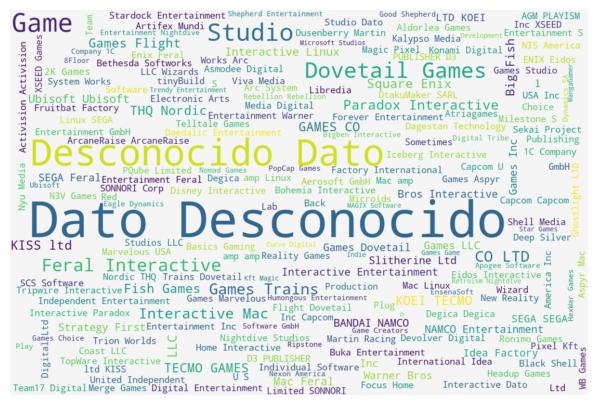

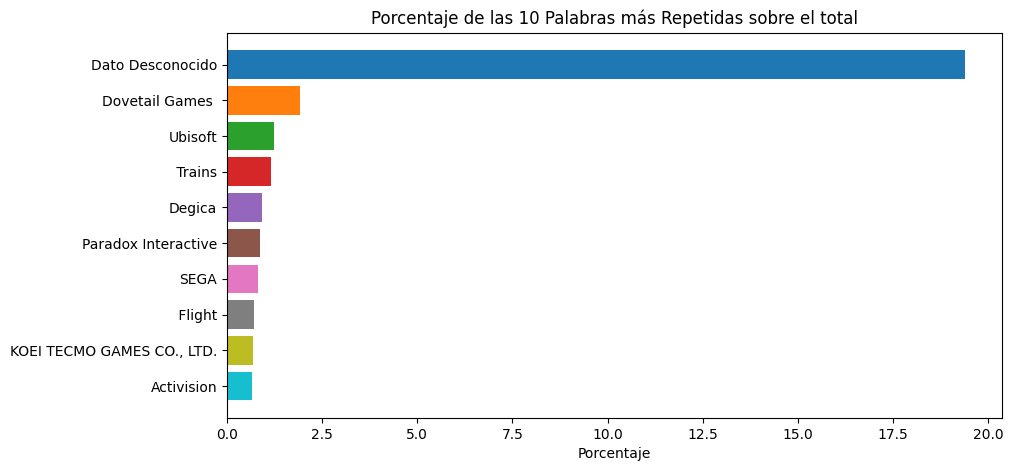

In [84]:
repres_categoricas(df_steam_games, 'publisher')

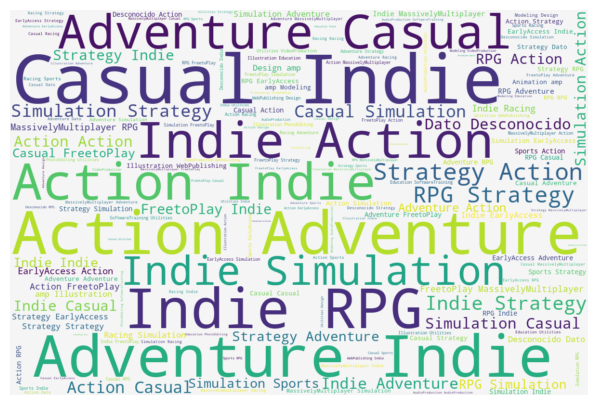

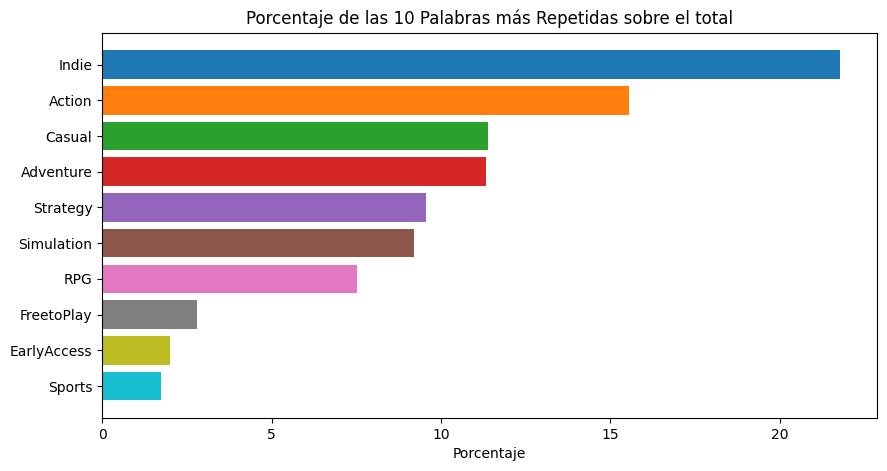

In [85]:
repres_categoricas(df_steam_games, 'genres')

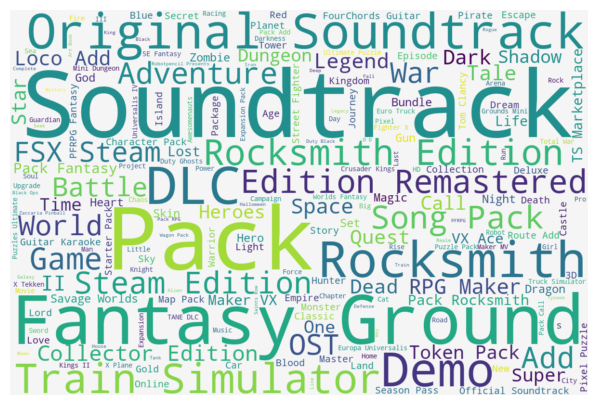

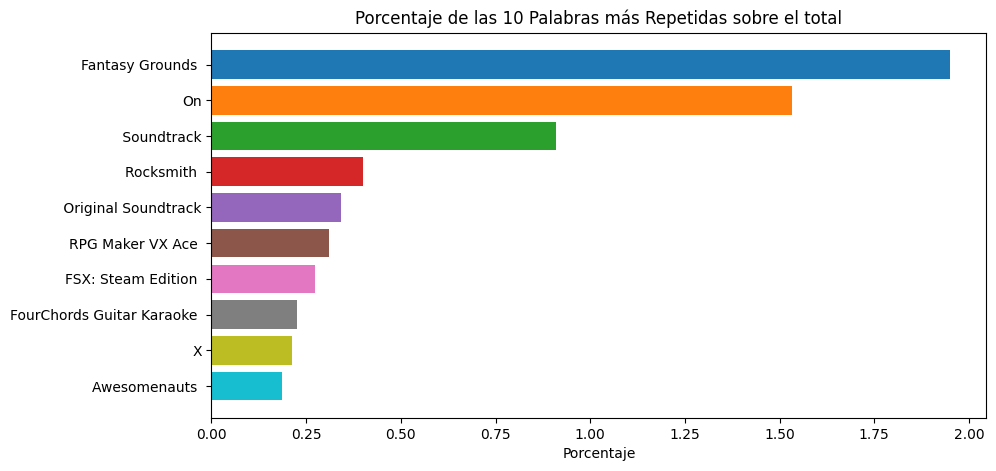

In [78]:
repres_categoricas(df_steam_games, 'app_name')

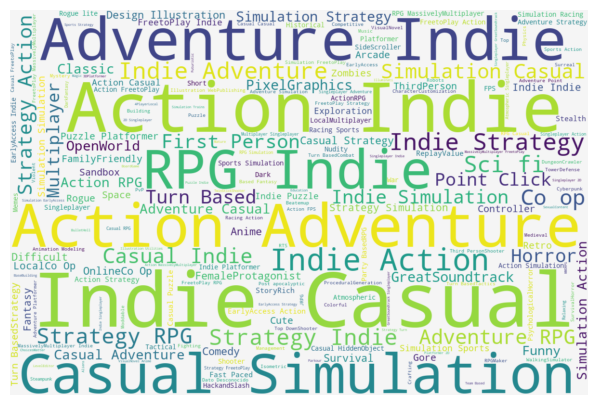

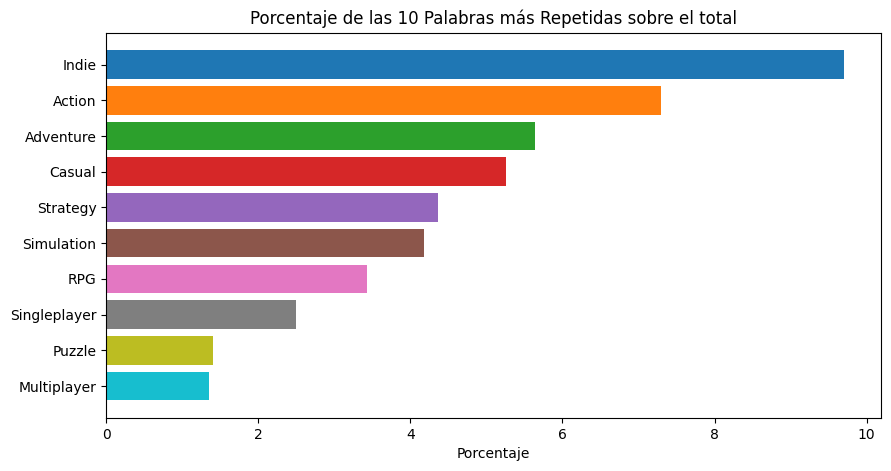

In [87]:
repres_categoricas(df_steam_games, 'tags')